# Basic of Phase unwrapping 

먼저 기본적인 것을 확인하기 위해서, 기본적인 **Cos** 함수를 만들어서, 이를 **FFT**하여 주파수 영역과 Phase 영역을 관찰해보자.

## Sin function

Sin 함수의 파라미터는 아래와 같다.  
     
$$ 1. \times \cos{(\omega_{0}t + \phi)}$$

- Sampling rate $\rightarrow \  F_{s} = 2000$
    
    
- Period $\rightarrow \  T = \frac{1}{F_{s}} $
    
    
- Frequency $\rightarrow \  F = 20$
    
    
- Omega $\rightarrow \  \omega = 2 \pi F$
    
    
- Amplitude $\rightarrow \  A = 1.$
    
    
- Phase $\rightarrow \  \phi = 0$


# phase가 0인 Sin함수

In [154]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

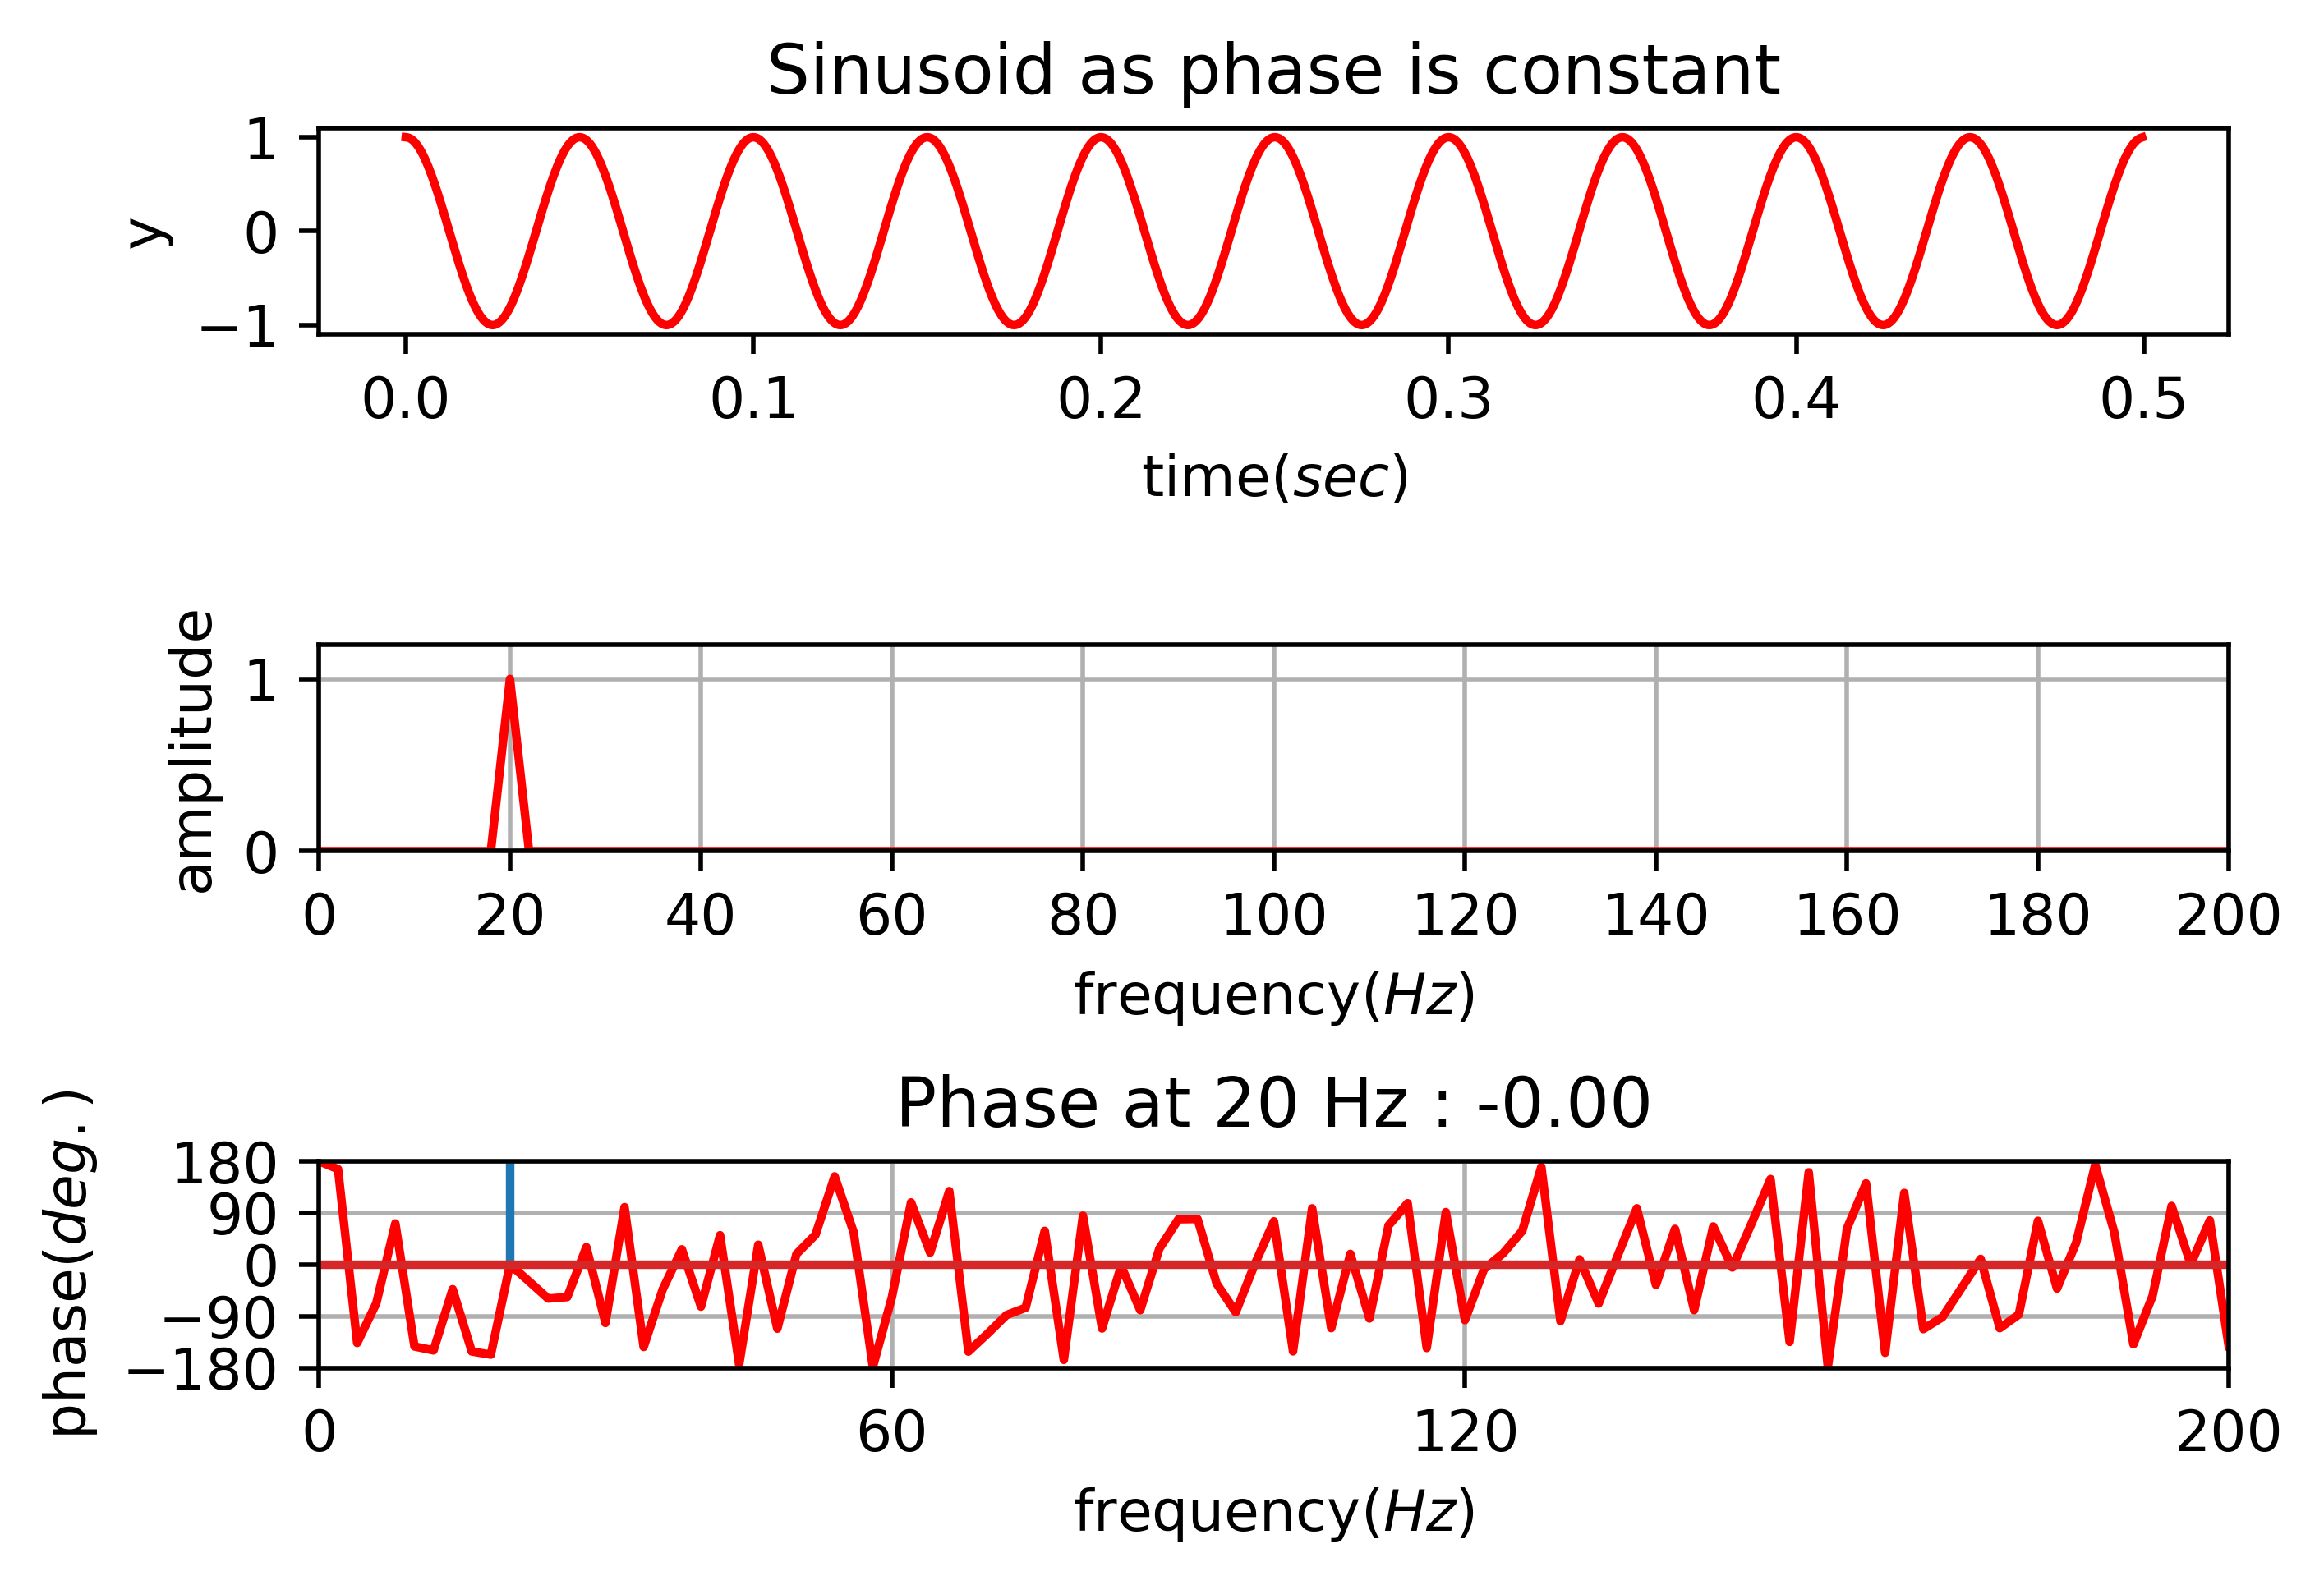

In [94]:
Fs = 2000                    # Sampling frequency
T = 1/Fs                     # Sample interval time
te= 0.5                      # End of time
t = np.arange(0, te, T)      # Time vector
Freq = 20
omega = 2 * np.pi * Freq
theta = 0

cos_signal = 1. * np.cos((omega * t) + theta)

# FFT
n = len(cos_signal)
NFFT = n
k = np.arange(NFFT)
f0 = k*Fs/NFFT
f0 = f0[range(math.trunc(NFFT/2))]

Y = np.fft.fft(cos_signal)/NFFT
Y = Y[range(math.trunc(NFFT/2))]
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

# Phase
index_at_20Hz = np.where(f0 == 20.)[0].squeeze()
phase_at_20Hz = phase_ang[index_at_20Hz]
mark_at_20Hz = np.zeros_like(f0)
mark_at_20Hz[index_at_20Hz] = 180

# 20Hz의 위상변화가 없는 Sin 신호
# figure 1 ..................................
plt.figure(num=2, dpi=500, facecolor='white')
plt.subplots_adjust(hspace=1.5, wspace=0.3)
plt.subplot(3, 1, 1)
plt.plot(t, cos_signal, 'r')
plt.title('Sinusoid as phase is constant')
plt.xlabel('time($sec$)')
plt.ylabel('y')

# Amplitude ....
plt.subplot(3, 1, 2)
plt.plot(f0,amplitude_Hz,'r')
plt.xticks(np.arange(0,500,20))
plt.xlim( 0, 200)
plt.ylim( 0, 1.2)
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

# Phase ....
plt.subplot(3, 1, 3)
plt.plot(f0,phase_ang,'r')
plt.stem(f0, mark_at_20Hz, 'c', linefmt='-', markerfmt='none')
plt.xlim( 0, 200)
plt.ylim( -180, 180)
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()
plt.title("Phase at 20 Hz : {value:.2f}".format(value=phase_at_20Hz))

plt.show()
plt.close()

# phase 함수가 $f(x) = x$인 Sin 함수

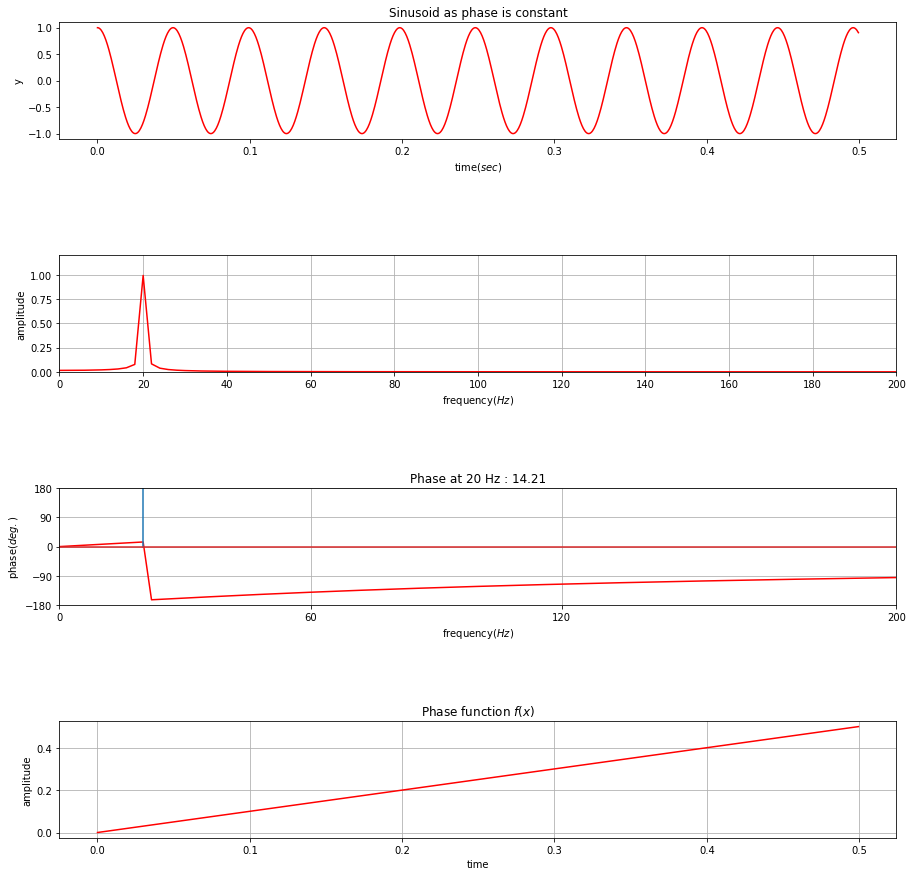

In [118]:
Fs = 2000                    # Sampling frequency
T = 1/Fs                     # Sample interval time
te= 0.5                      # End of time
t = np.arange(0, te, T)      # Time vector
Freq = 20
omega = 2 * np.pi * Freq
theta = t

cos_signal = 1. * np.cos((omega * t) + theta)

# FFT
n = len(cos_signal)
NFFT = n
k = np.arange(NFFT)
f0 = k*Fs/NFFT
f0 = f0[range(math.trunc(NFFT/2))]

Y = np.fft.fft(cos_signal)/NFFT
Y = Y[range(math.trunc(NFFT/2))]
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

# Phase
index_at_20Hz = np.where(f0 == 20.)[0].squeeze()
phase_at_20Hz = phase_ang[index_at_20Hz]
mark_at_20Hz = np.zeros_like(f0)
mark_at_20Hz[index_at_20Hz] = 180

# 20Hz의 위상변화가 없는 Sin 신호
# figure 1 ..................................
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=1, wspace=0.3)
plt.subplot(4, 1, 1)
plt.plot(t, cos_signal, 'r')
plt.title('Sinusoid as phase is constant')
plt.xlabel('time($sec$)')
plt.ylabel('y')

# Amplitude ....
plt.subplot(4, 1, 2)
plt.plot(f0,amplitude_Hz,'r')
plt.xticks(np.arange(0,500,20))
plt.xlim( 0, 200)
plt.ylim( 0, 1.2)
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

# Phase ....
plt.subplot(4, 1, 3)
plt.plot(f0,phase_ang,'r')
plt.stem(f0, mark_at_20Hz, 'c', linefmt='-', markerfmt='none')
plt.xlim( 0, 200)
plt.ylim( -180, 180)
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()
plt.title("Phase at 20 Hz : {value:.2f}".format(value=phase_at_20Hz))

# Phase ....
plt.subplot(4, 1, 4)
plt.plot(t, theta, 'r')

plt.xlabel('time')
plt.ylabel('amplitude')
plt.grid()
plt.title("Phase function $f(x)$")


plt.show()
plt.close()

# Self-Question

**Phase function**을 적용했는데, FFT를 통해서 확인해보면 함수가 아니라 상수값이 나온다.   
**STFT**를 적용해보면 **Phase**의 변화(Phase function)를 관측할 수 있지 않을까?

## Point

- 슬라이싱방법으로 윈도우 슬라이드를 구현하지 않는다
    - Delay가 되었는지 확인해야한다.
    
    
- 주기에 맞춰서 shift한다.
    - 주기가 안맞으면, 합성신호가 되어 다른 주파수들이 튀어나온다.
    
# phase가 0인 Sin함수 (Shifted)

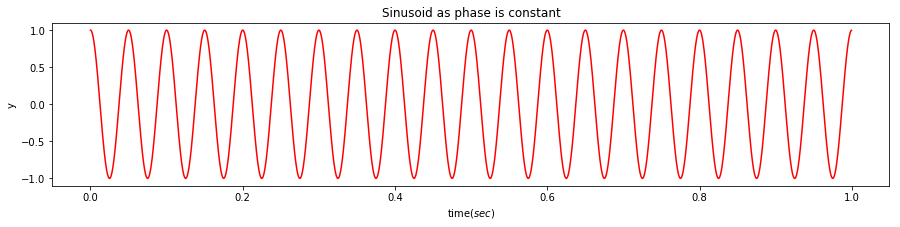

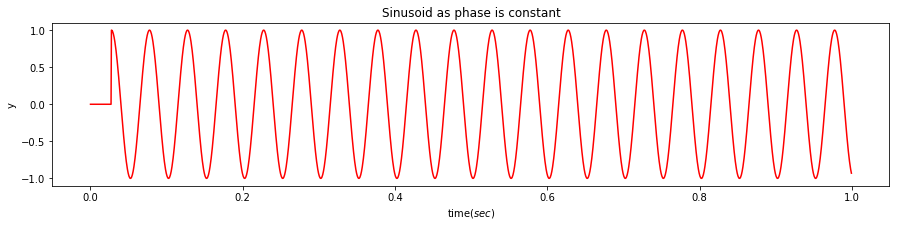

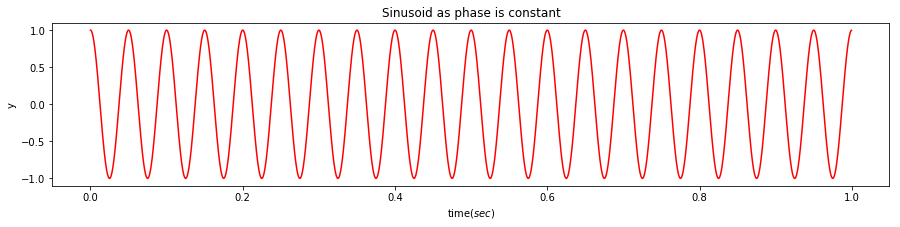

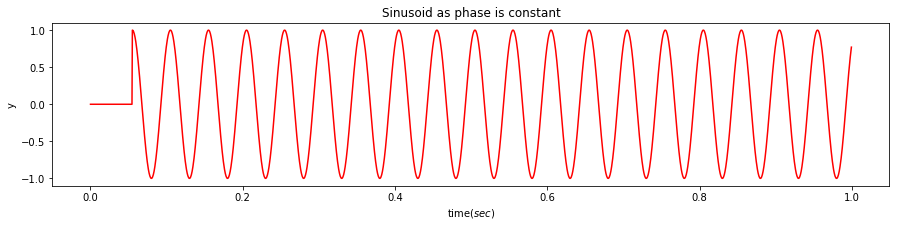

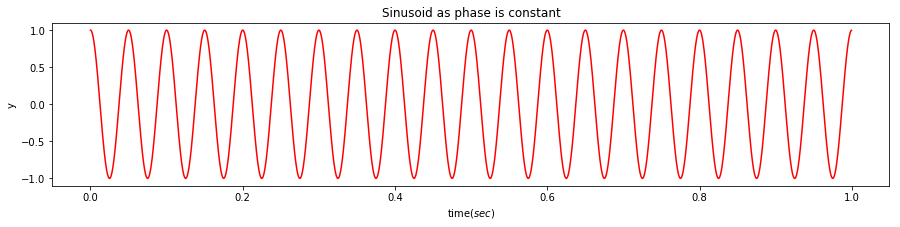

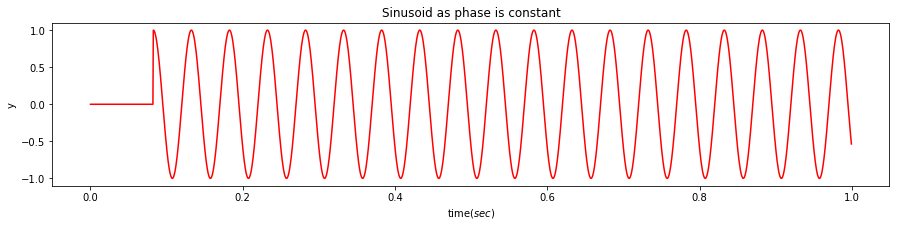

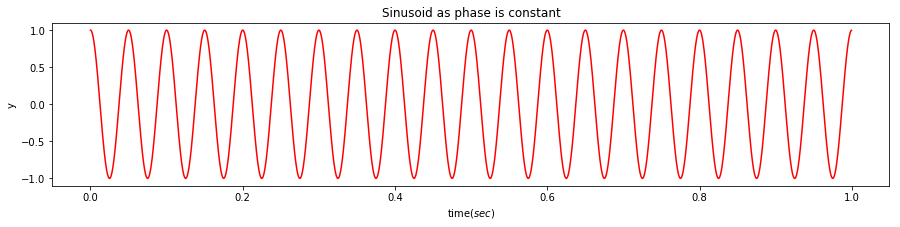

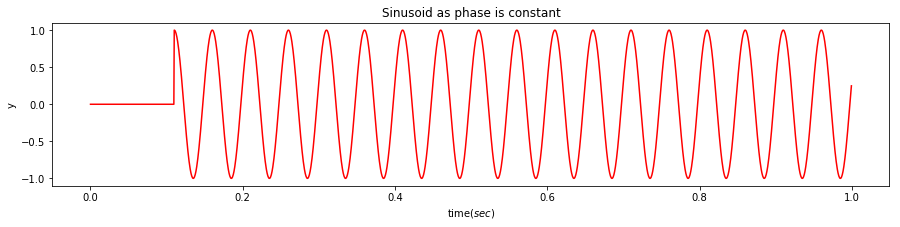

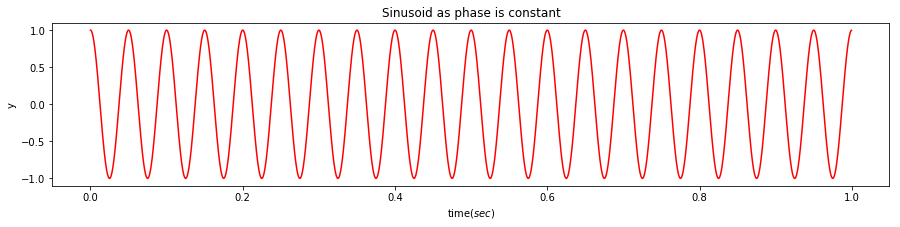

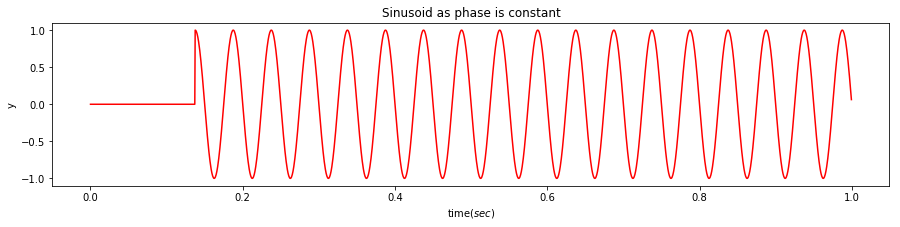

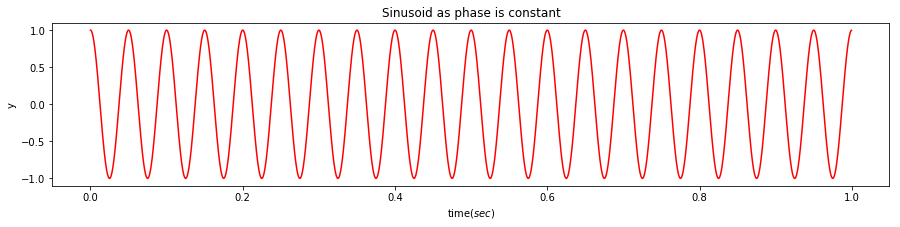

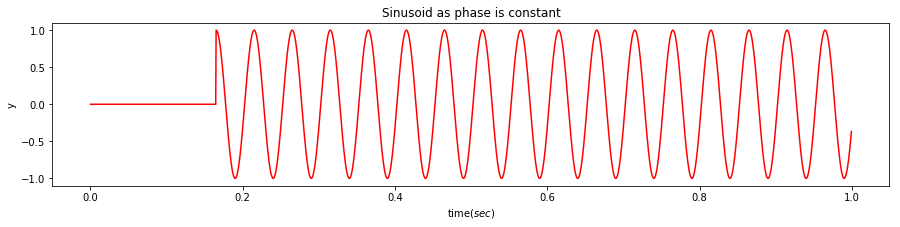

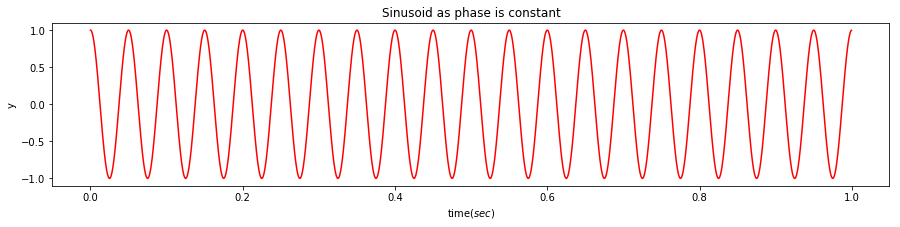

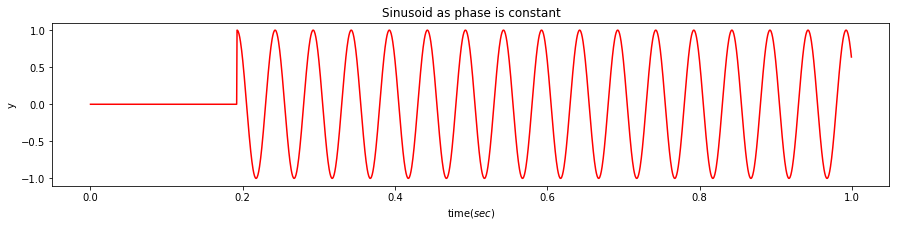

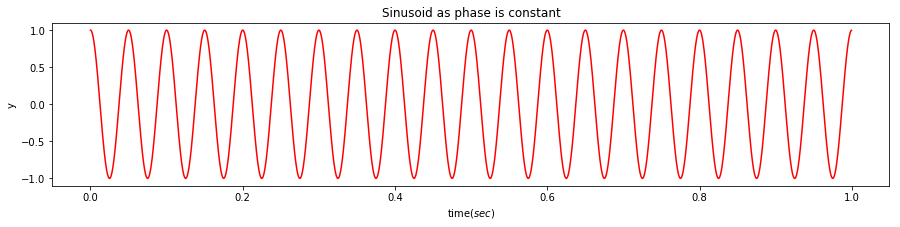

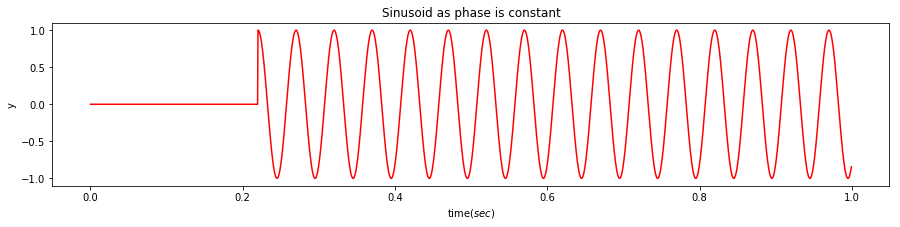

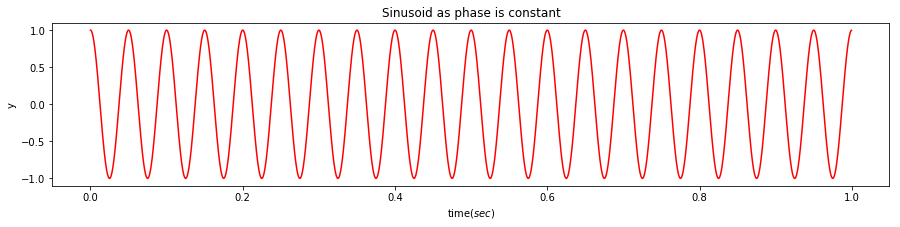

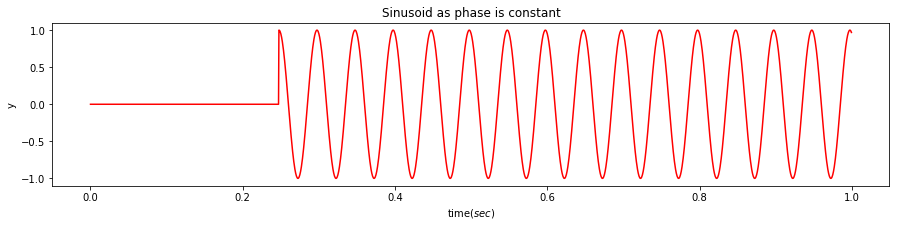

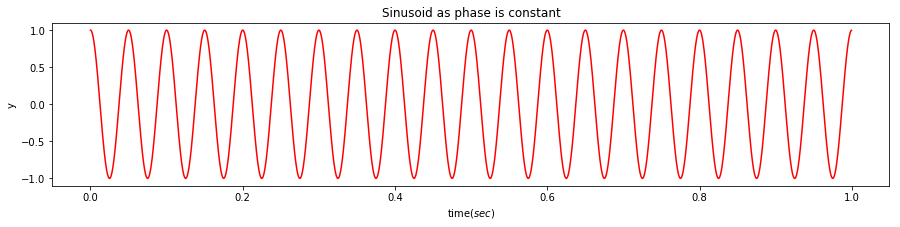

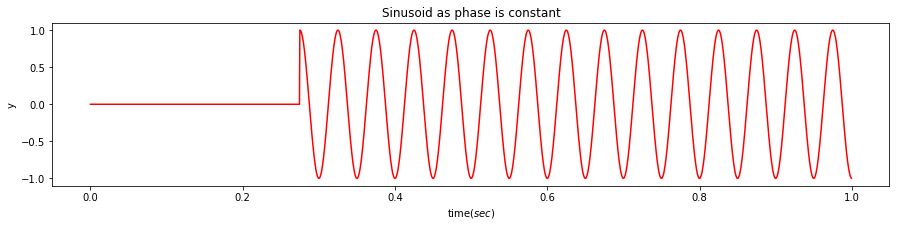

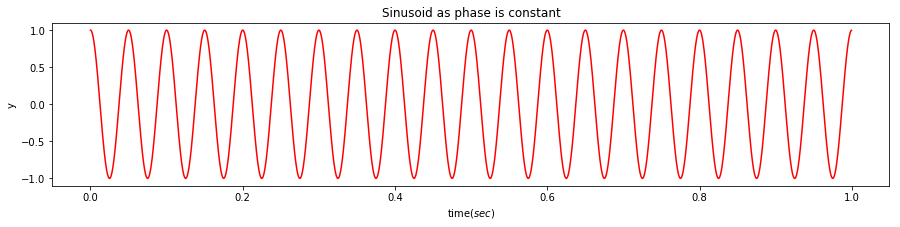

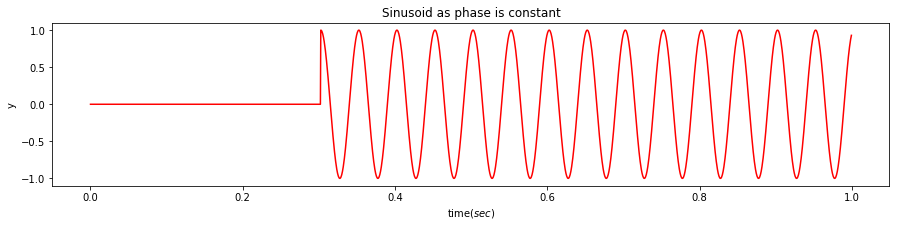

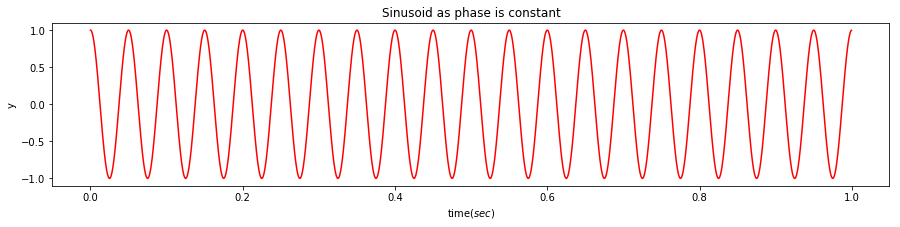

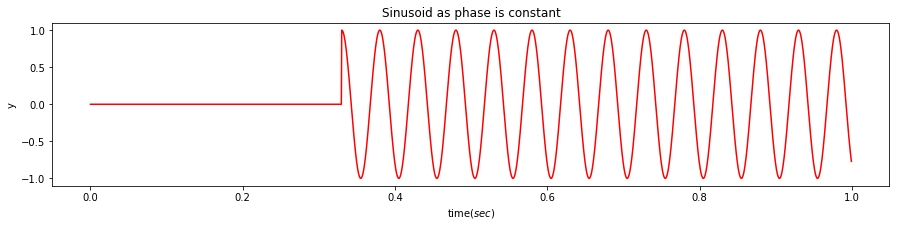

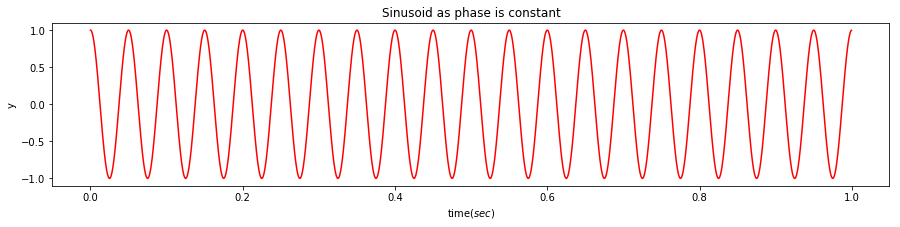

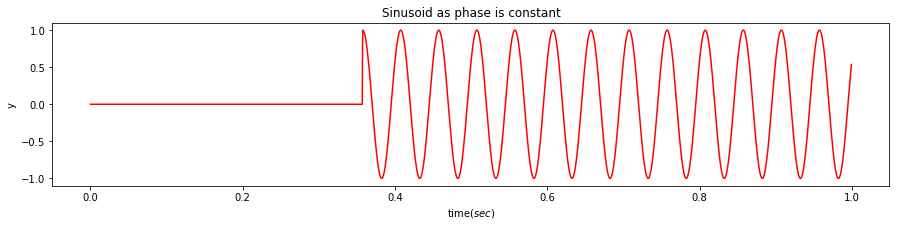

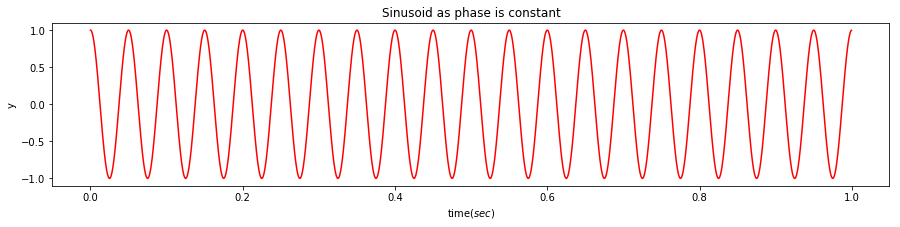

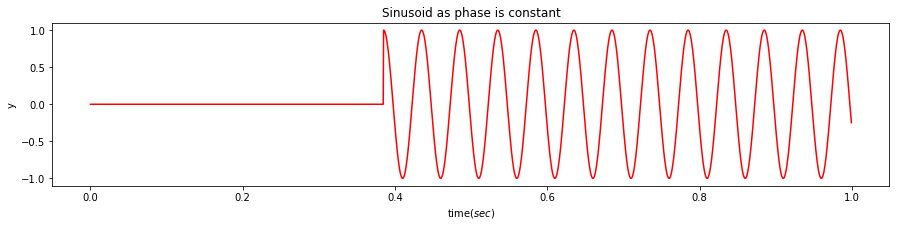

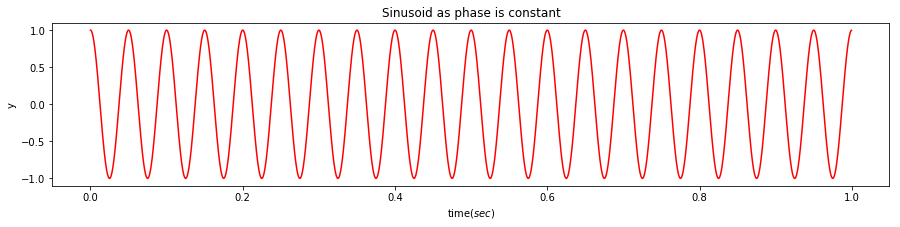

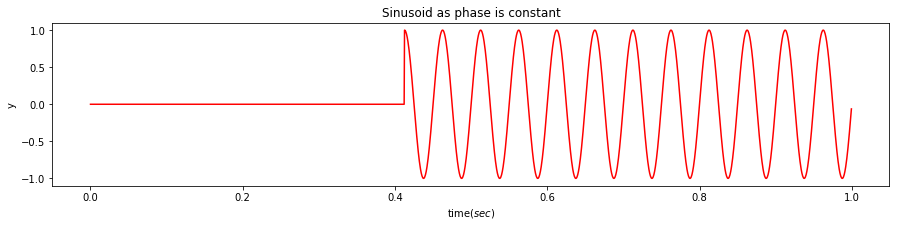

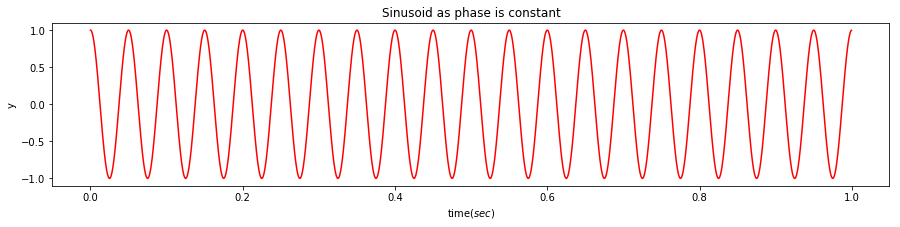

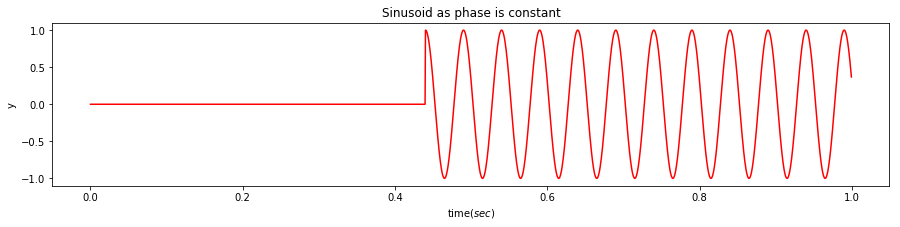

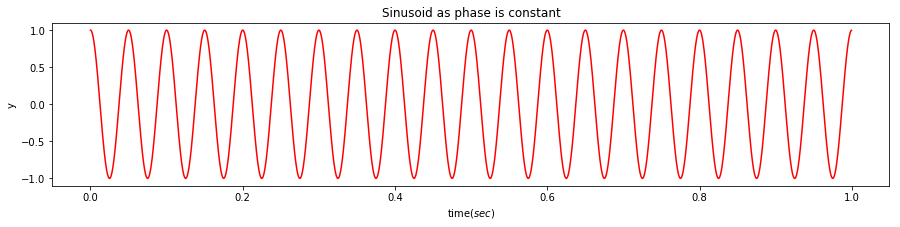

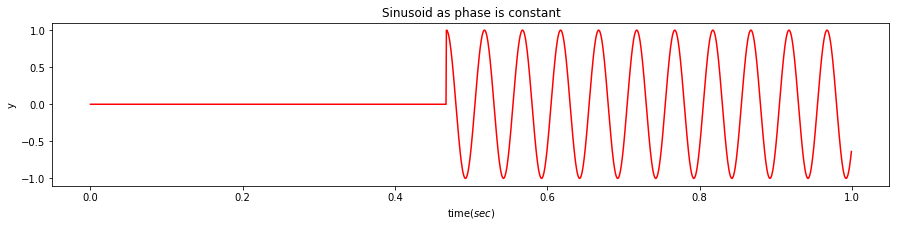

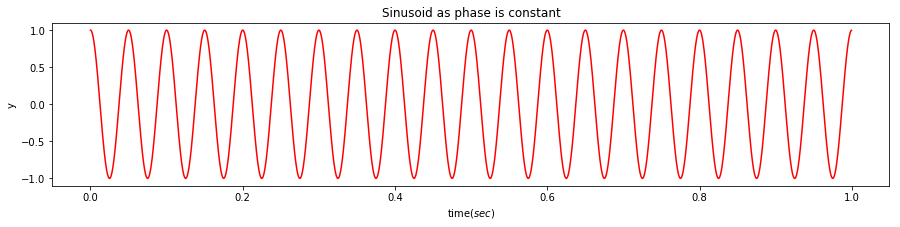

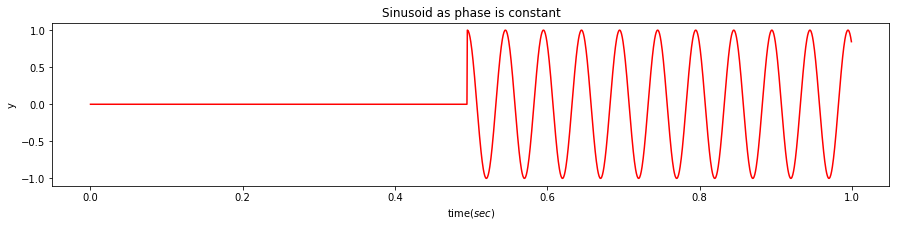

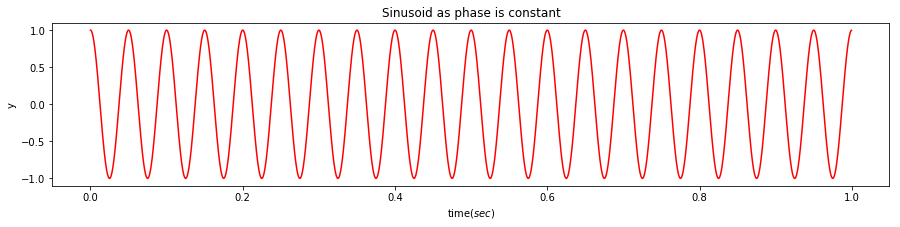

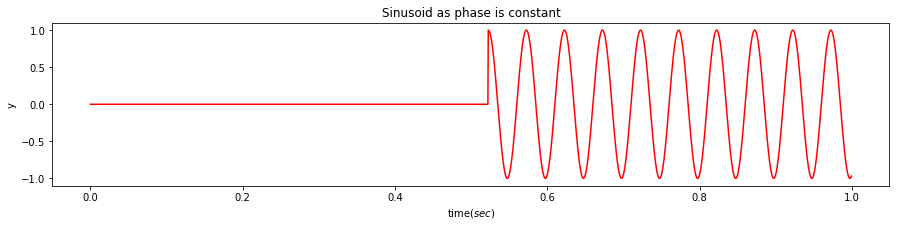

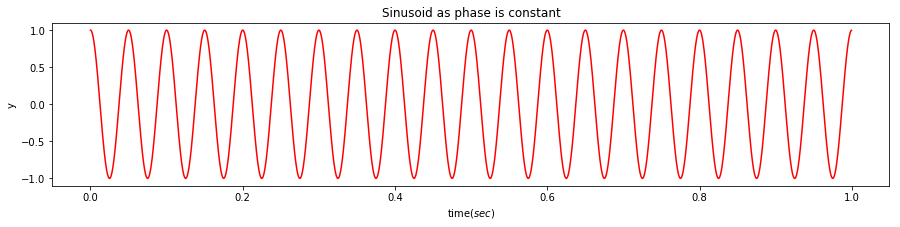

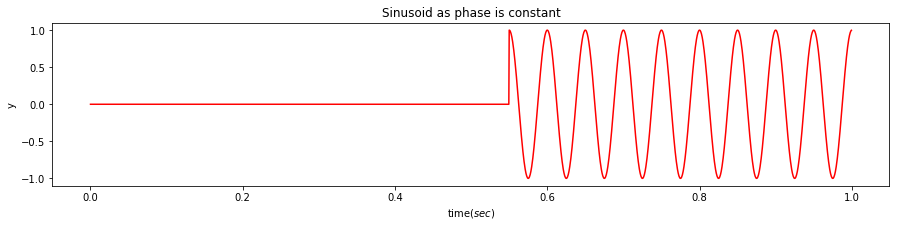

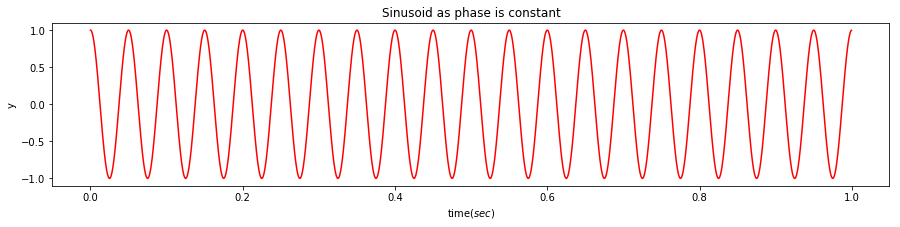

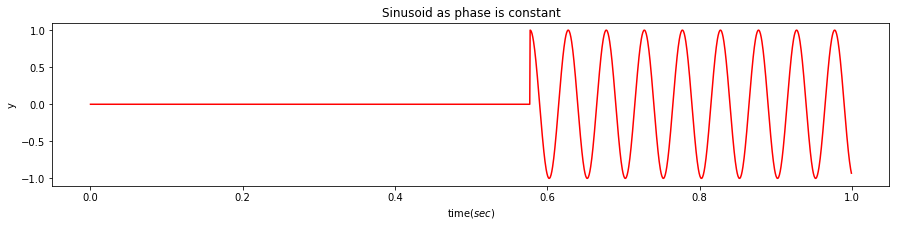

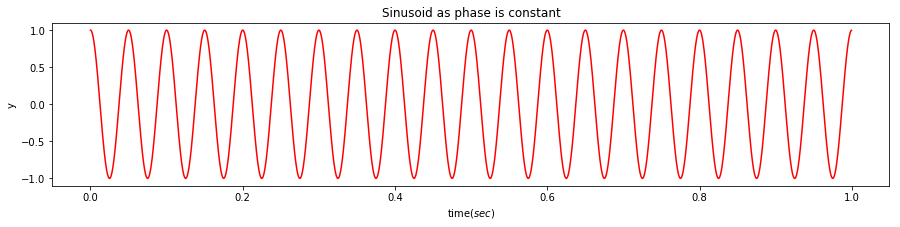

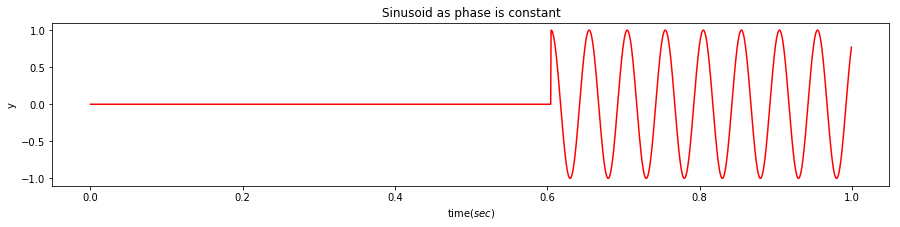

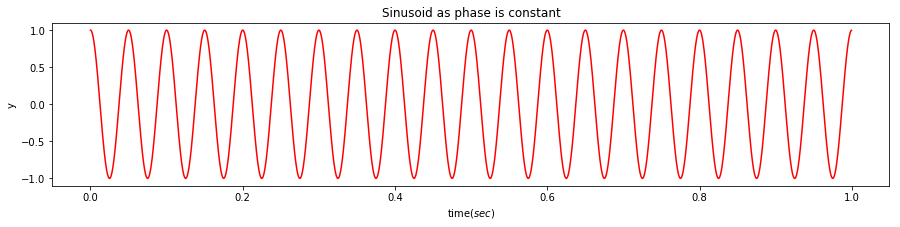

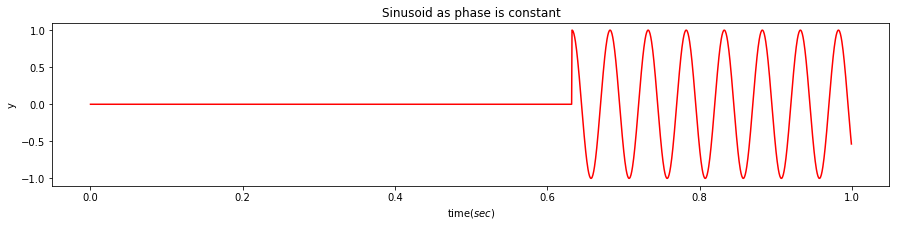

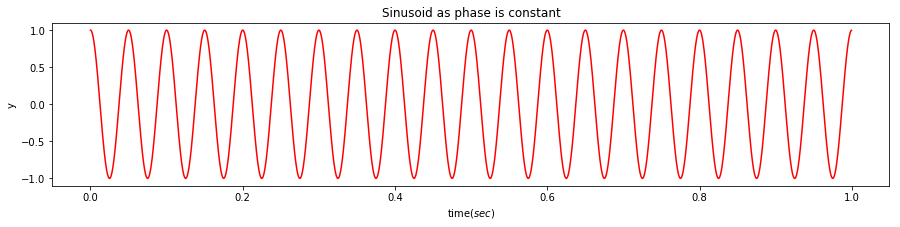

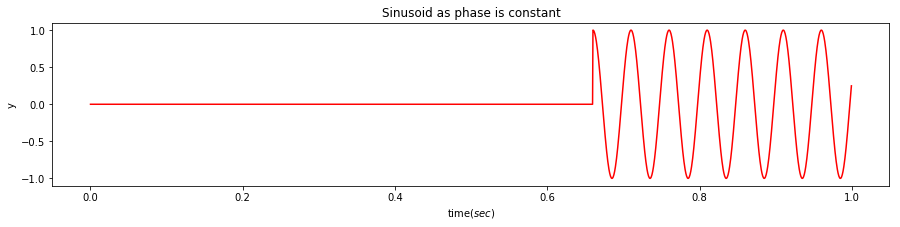

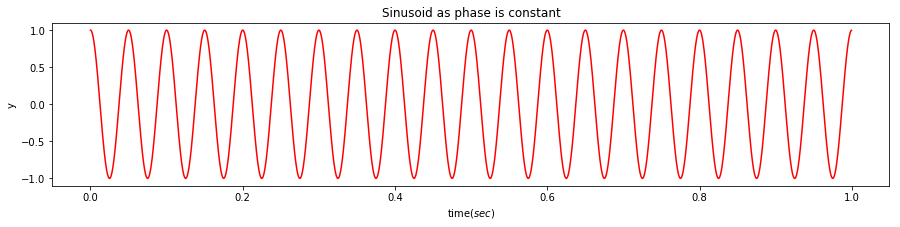

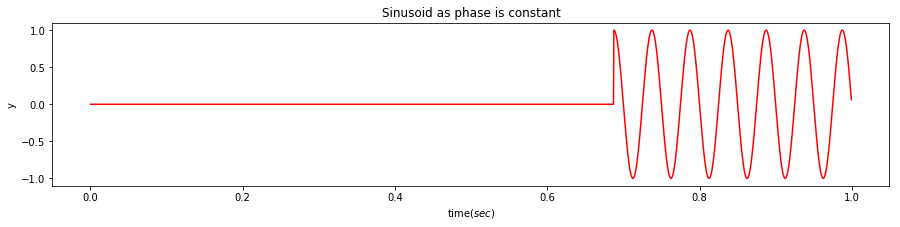

In [184]:
Fs = 2000                    # Sampling frequency
T = 1/Fs                     # Sample interval time
te= 1                        # End of time
t = np.arange(0, te, T)      # Time vector
Freq = 20
omega = 2 * np.pi * Freq
theta = 0

cos_signal = 1. * np.cos((omega * t) + theta)

for i in range(30):
    idx = (i+1) * 55
    df_cos = pd.DataFrame(cos_signal)
    df_cos = df_cos.shift(periods=idx, fill_value=0)
    delayed_cos = df_cos.values

    # FFT
    n = len(shifted_signal)
    NFFT = n
    k = np.arange(NFFT)
    f0 = k*Fs/NFFT
    f0 = f0[range(math.trunc(NFFT/2))]

    Y = np.fft.fft(shifted_signal)/NFFT
    Y = Y[range(math.trunc(NFFT/2))]
    amplitude_Hz = 2*abs(Y)
    phase_ang = np.angle(Y)*180/np.pi

    # figure 1 ..................................
    plt.figure(figsize=(15, 3))
    plt.plot(t, cos_signal, 'r')
    plt.title('Sinusoid as phase is constant')
    plt.xlabel('time($sec$)')
    plt.ylabel('y')

    plt.show()
    plt.close()

    plt.figure(figsize=(15, 3))
    plt.plot(t, delayed_cos, 'r')
    plt.title('Sinusoid as phase is constant')
    plt.xlabel('time($sec$)')
    plt.ylabel('y')

    plt.show()
    plt.close()

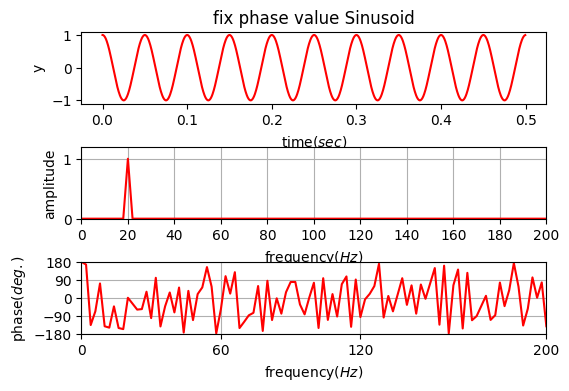

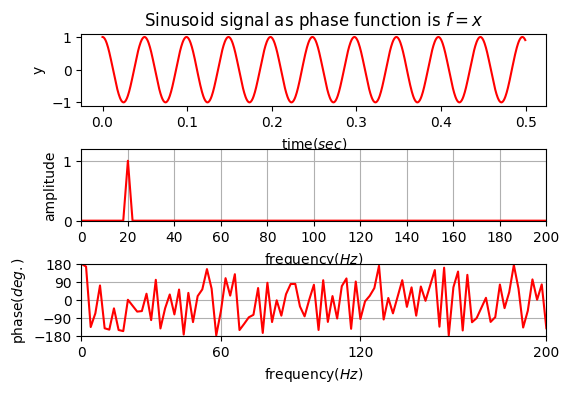

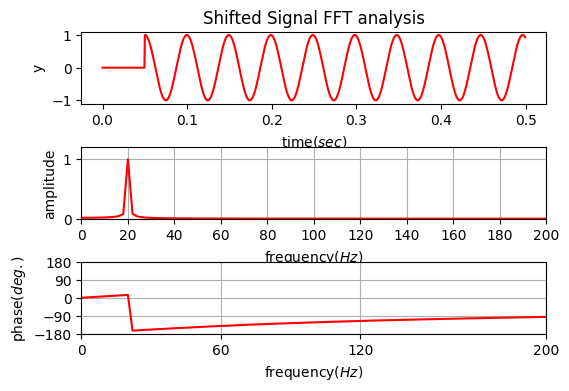

In [3]:
Fs = 2000                    # Sampling frequency
T = 1/Fs                     # Sample interval time
te= 0.5                     # End of time
t = np.arange(0, te, T)   # Time vector

# noise = np.random.normal(0,0.05,len(t))
frequency = 20
omega = 2 * np.pi * frequency

theta = 0
x = 1. * np.cos(omega * t + theta)
y = x 

# Calculate FFT ....................
n=len(y)
NFFT=n
k=np.arange(NFFT)
f0=k*Fs/NFFT
f0=f0[range(math.trunc(NFFT/2))]

Y=np.fft.fft(y)/NFFT
Y=Y[range(math.trunc(NFFT/2))]
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

# 20Hz의 위상변화가 없는 Sin 신호
# figure 1 ..................................
plt.figure(num=2,dpi=100,facecolor='white')
plt.subplots_adjust(hspace = 0.6, wspace = 0.3)
plt.subplot(3,1,1)
plt.plot(t,y,'r')
plt.title('fix phase value Sinusoid')
plt.xlabel('time($sec$)')
plt.ylabel('y')

# Amplitude ....
plt.subplot(3,1,2)
plt.plot(f0,amplitude_Hz,'r')
plt.xticks(np.arange(0,500,20))
plt.xlim( 0, 200)
plt.ylim( 0, 1.2)
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

# Phase ....
plt.subplot(3,1,3)
plt.plot(f0,phase_ang,'r')
plt.xlim( 0, 200)
plt.ylim( -180, 180)
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()

plt.show()
plt.close()

# ==============================================================================

# 위상변화 함수가 10Hz의 Sin함수인 10Hz의 Sin신호
frequency = 20
omega = 2 * np.pi * frequency

phase_frequency = 20
phase_omega = 2 * np.pi * phase_frequency
theta = t
x = 1. * np.cos(omega * t + theta)
y = x 

# figure 1 ..................................
plt.figure(num=2,dpi=100,facecolor='white')
plt.subplots_adjust(hspace = 0.6, wspace = 0.3)
plt.subplot(3,1,1)
plt.plot(t,y,'r')
plt.title('Sinusoid signal as phase function is $f=x$')
plt.xlabel('time($sec$)')
plt.ylabel('y')

# Amplitude ....
plt.subplot(3,1,2)
plt.plot(f0,amplitude_Hz,'r')   #  2* ???
plt.xticks(np.arange(0,500,20))
plt.xlim( 0, 200)
plt.ylim( 0, 1.2)
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

# Phase ....
plt.figure(num=2,dpi=100,facecolor='white')
plt.subplot(3,1,3)
plt.plot(f0,phase_ang,'r')   #  2* ???
plt.xlim( 0, 200)
plt.ylim( -180, 180)
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()

plt.show()
plt.close()

# ==============================================================================

shifted_y = shift_signal_in_frequency_domain(y, 100)

shifted_f0=k*Fs/NFFT    # double sides frequency range
shifted_f0=shifted_f0[range(math.trunc(NFFT/2))]        # single sied frequency range

shifted_Y=np.fft.fft(y)/NFFT        # fft computing and normaliation
shifted_Y=shifted_Y[range(math.trunc(NFFT/2))]          # single sied frequency range
shifted_amplitude_Hz = 2*abs(shifted_Y)
shifted_phase_ang = np.angle(shifted_Y)*180/np.pi

# figure 1 ..................................
plt.figure(num=2,dpi=100,facecolor='white')
plt.subplots_adjust(hspace = 0.6, wspace = 1)
plt.subplot(3,1,1)

plt.plot(t,shifted_y,'r')
plt.title('Shifted Signal FFT analysis')
plt.xlabel('time($sec$)')
plt.ylabel('y')
#plt.xlim( 0, 0.1)

# Amplitude ....
#plt.figure(num=2,dpi=100,facecolor='white')
plt.subplot(3,1,2)

# Plot single-sided amplitude spectrum.

plt.plot(shifted_f0,shifted_amplitude_Hz,'r')   #  2* ???
plt.xticks(np.arange(0,500,20))
plt.xlim( 0, 200)
plt.ylim( 0, 1.2)
#plt.title('Single-Sided Amplitude Spectrum of y(t)')
plt.xlabel('frequency($Hz$)')
plt.ylabel('amplitude')
plt.grid()

# Phase ....
#plt.figure(num=2,dpi=100,facecolor='white')
plt.subplot(3,1,3)
plt.plot(shifted_f0,shifted_phase_ang,'r')   #  2* ???
plt.xlim( 0, 200)
plt.ylim( -180, 180)
#plt.title('Single-Sided Phase Spectrum of y(t)')
plt.xlabel('frequency($Hz$)')
plt.ylabel('phase($deg.$)')
plt.xticks([0, 60, 120, 200])
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()

# 위상 변화가 있는데 Phase에 시간에 따른 Phase 변화가 나타나지 않는다.

# Slide Windows 기반으로 Phase 변화를 확인할 수 있지 않을까?

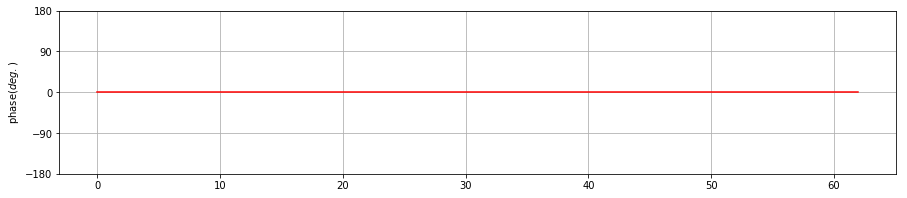

In [5]:
Fs = 2000                    # Sampling frequency
T = 1/Fs                     # Sample interval time
te= 100                     # End of time
t = np.arange(0, te, T)   # Time vector

# noise = np.random.normal(0,0.05,len(t))
frequency = 20
omega = 2 * np.pi * frequency

k = 1. * np.sin(phase_omega * t)
theta = 0
x = 1. * np.cos((omega * t) + theta)
y = x

slidewindow = SlideWindows(size=100, overlap = 1)
result = slidewindow(y)

phase = list()

num_slice, _ = result.shape
for i in range(num_slice):
    signal = result[i]

    n = len(signal)    
    NFFT = n
    k = np.arange(NFFT)
    f0 = k * Fs / NFFT
    f0 = f0[range(math.trunc(NFFT/2))]
    
    fft = np.fft.fft(signal)/NFFT
    fft = fft[range(math.trunc(NFFT/2))]
    amplitude_Hz = 2*abs(fft)            
    phase_ang = np.angle(fft) * 180 / np.pi            
        
    index = np.where(f0 == 20)[0]
    phase.append(phase_ang[index])
    
    # Sliced Signal
    #plt.figure()
    #plt.plot(signal)
    #plt.grid()
    #plt.show()
        
    # FFT
    #plt.plot(f0, amplitude_Hz,'r')
    #plt.xlabel('frequency($Hz$)')
    #plt.ylabel('amplitude')
    #plt.xlim( 0, 50)
    #plt.ylim( 0, 1.2)
    #plt.grid()
    #plt.show()
    
    # Phase
    # plt.figure(figsize=(15,3))
    # plt.plot(f0,phase_ang,'r')    
    # plt.ylim( -180, 180)    
    # plt.xlabel('frequency($Hz$)')
    # plt.ylabel('phase($deg.$)')    
    # plt.yticks([-180, -90, 0, 90, 180])
    # plt.grid()    

#print(phase)
plt.figure(figsize=(15, 3))
plt.plot(phase, 'r')
plt.ylim([-180, 180])
plt.ylabel('phase($deg.$)')
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()
plt.show()
#print(phase)


# Phase function

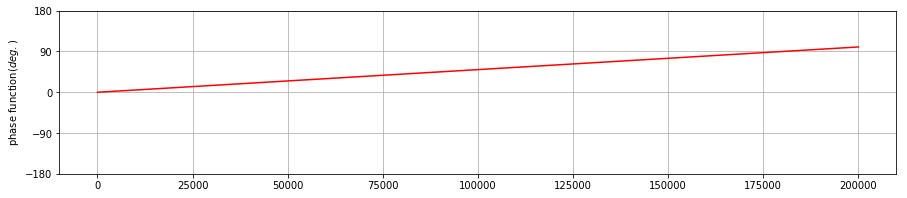

In [9]:
y = x
t = np.arange(0, te, T)

plt.figure(figsize=(15, 3))
plt.plot(t, 'r')
plt.ylim(-1, 1)
plt.ylabel('phase function($deg.$)')
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()
plt.show()

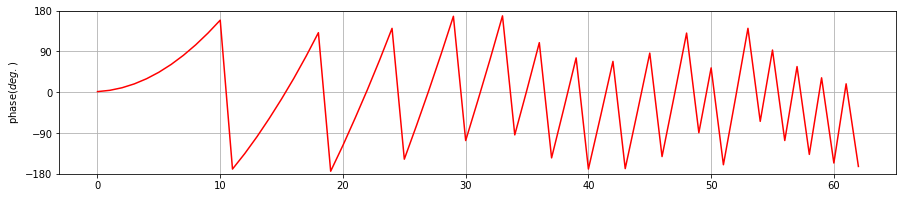

In [6]:
Fs = 2000                    # Sampling frequency
T = 1/Fs                     # Sample interval time
te= 100                     # End of time
t = np.arange(0, te, T)   # Time vector

# noise = np.random.normal(0,0.05,len(t))
frequency = 20
omega = 2 * np.pi * frequency

k = 1. * np.sin(phase_omega * t)
theta = t
x = 1. * np.cos((omega * t) + theta)
y = x

slidewindow = SlideWindows(size=100, overlap = 1)
result = slidewindow(y)

phase = list()

num_slice, _ = result.shape
for i in range(num_slice):
    signal = result[i]

    n = len(signal)    
    NFFT = n
    k = np.arange(NFFT)
    f0 = k * Fs / NFFT
    f0 = f0[range(math.trunc(NFFT/2))]
    
    fft = np.fft.fft(signal)/NFFT
    fft = fft[range(math.trunc(NFFT/2))]
    amplitude_Hz = 2*abs(fft)            
    phase_ang = np.angle(fft) * 180 / np.pi            
        
    index = np.where(f0 == 20)[0]
    phase.append(phase_ang[index][0])    
    
    # Sliced Signal
    #plt.figure()
    #plt.plot(signal)
    #plt.grid()
    #plt.show()
        
    # FFT
    #plt.plot(f0, amplitude_Hz,'r')
    #plt.xlabel('frequency($Hz$)')
    #plt.ylabel('amplitude')
    #plt.xlim( 0, 50)
    #plt.ylim( 0, 1.2)
    #plt.grid()
    #plt.show()
    
    # Phase
    # plt.figure(figsize=(15,3))
    # plt.plot(f0,phase_ang,'r')    
    # plt.ylim( -180, 180)    
    # plt.xlabel('frequency($Hz$)')
    # plt.ylabel('phase($deg.$)')    
    # plt.yticks([-180, -90, 0, 90, 180])
    # plt.grid()    

#print(phase)
plt.figure(figsize=(15, 3))
plt.plot(phase, 'r')
plt.ylim(-1, 1)
plt.ylabel('wraped phase($deg.$)')
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()
plt.show()
#print(phase)


# Phase unwrap Algorithms
## numpy.unwrap()

In [7]:
print(phase, end="\n\n")
unwrap_phase = np.unwrap(phase)
print(unwrap_phase)

[1.4210877504592334, 4.263268839979907, 9.948432753348634, 18.481432162885465, 29.876829366633498, 44.16356553802303, 61.380602268915055, 81.55290384009821, 104.64864903510957, 130.55522604252076, 159.1434597838714, -169.57350469206472, -135.35503298115097, -97.96178551135208, -57.58027758077429, -14.683198801570008, 30.836121638329942, 79.63752651294918, 131.52019386016346, -174.302959643088, -117.16839974261926, -56.61327343968667, 6.1749800766166265, 71.95516037911585, 141.0795840120534, -147.72453135550964, -72.92590482379624, 4.288512405074899, 84.46507138777713, 167.70896152187558, -106.5906755845714, -17.504372151289687, 73.89412433640463, 168.66560825134727, -94.07860934380365, 6.200225250782014, 109.49871990157315, -144.84431347478827, -35.55389534766111, 75.833693393258, -169.52300080150644, -51.7817753236221, 68.15600907580422, -168.56681372728733, -42.21372854112122, 86.43250110795711, -141.96197960910735, -7.030766463199483, 130.63169005052387, -89.22351851965264, 53.80376

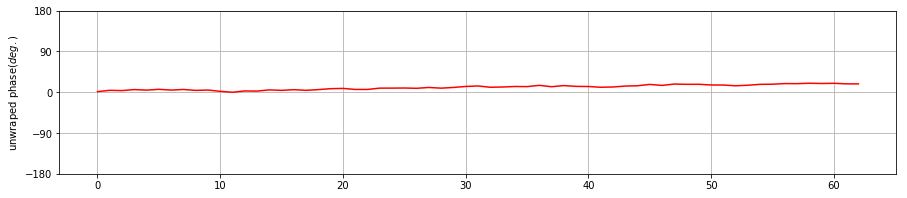

In [8]:
plt.figure(figsize=(15, 3))
plt.plot(unwrap_phase, 'r')
plt.ylim(-1, 1)
plt.ylabel('unwraped phase($deg.$)')
plt.yticks([-180, -90, 0, 90, 180])
plt.grid()
plt.show()

In [ ]:
# emg file directory & path

emg_rock_short_path = "./myo/myo_emg_data(short_frequently_lock).txt"
emg_rock_long_path = "./myo/myo_emg_data(long, Rock).txt"
emg_nothing = "./myo/myo_emg_data(nothing).txt"

In [ ]:
# load Strongly Short Power emg data

sensor_channels = 8
short_emgs = [list() for i in range(sensor_channels)]

with open(emg_rock_short_path) as f:
    while(1):                
        line = f.readline().rstrip()
        line = line.replace(" ", "")
        if (line is None or line == ""):
            break
        
        #print(line)        
        _emgs = line.split("\t")                
        
        for i in range(sensor_channels):
            short_emgs[i].append(int(_emgs[i]))
            

In [ ]:
fig = plt.figure(figsize=(10,12))
fig.suptitle("Gesture: Rock, Strongly Short Power", fontsize=20)

for i in range(sensor_channels):
    arg = "81" + str(i)
    plt.subplot(arg)
    plt.plot(short_emgs[i])
    plt.grid()
    plt.ylim([-128, 127])


plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 3))
fig.suptitle("Gesture: Rock, Strongly Short Power", fontsize=20)

plt.plot(short_emgs[i])
plt.grid()
plt.ylim([-128, 127])

plt.show()

In [ ]:
signal = short_emgs[i]



Fs = 200.
NFFT = len(signal)
k = np.arange(NFFT)
f0 = k*Fs/NFFT
f0 = f0[range(math.trunc(NFFT/2))]

Y=np.fft.fft(signal)/NFFT               # fft computing and normaliation
Y=Y[range(math.trunc(NFFT/2))]          # single sied frequency range
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Signal", fontsize=20)

plt.subplot(311)
plt.plot(short_emgs[i])
plt.grid()
plt.ylim([-128, 127])
plt.xlabel("time")
plt.ylabel("y")

plt.subplot(312)
plt.plot(f0, amplitude_Hz, 'r')
plt.xlabel("frequency($Hz$)")
plt.ylabel("amplitude")

plt.subplot(313)
plt.plot(f0, phase_ang)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.ylim( -180, 180)

plt.show()

# Shifted
shifted_signal = shift_signal_in_frequency_domain(signal, 20)

Y=np.fft.fft(shifted_signal)/NFFT               # fft computing and normaliation
Y=Y[range(math.trunc(NFFT/2))]          # single sied frequency range
amplitude_Hz = 2*abs(Y)
phase_ang = np.angle(Y)*180/np.pi

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Shifted Signal", fontsize=20)

plt.subplot(311)
plt.plot(shifted_signal)
plt.grid()
plt.ylim([-128, 127])
plt.xlabel("time")
plt.ylabel("y")

plt.subplot(312)
plt.plot(f0, amplitude_Hz, 'r')
plt.xlabel("frequency($Hz$)")
plt.ylabel("amplitude")

plt.subplot(313)
plt.plot(f0, phase_ang)
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.ylim( -180, 180)

plt.show()




In [4]:
class SlideWindows:
    def __init__(self, size : int, overlap : float):
        self.size = size
        self.step = round(size * overlap)
        
    def __call__(self, data):
        
        # data should be 1-d numpy.ndarray
        result = list()
        start_idx = 0        
        i = 0
        
        while((len(data) - start_idx) > 0):                                            
            start_idx = start_idx + (i * self.step)
            end_idx = start_idx + self.size                    
            
            if (len(data) - start_idx) < self.size:                
                tmp = data[start_idx:].squeeze().tolist()
                length = self.size - len(tmp)
                
                for i in range(length):
                    tmp.append(0)
                                            
                ex_list = list(set(tmp))
                
                if (len(ex_list) > 1) and (tmp != []):                    
                    tmp = np.asarray(tmp)
                    result.append(tmp)
                else:
                    result = np.asarray(result).squeeze()            
                    return result                    
            
            if data[start_idx:end_idx].size == self.size :                
                result.append(data[start_idx:end_idx])
            
            i += 1
            
        

In [95]:
def nextpow2(i):
    '''
    Find the next power 2 number for FFT
    '''
    
    n = 1
    while n < i: n *= 2
    return n

def shift_signal_in_frequency_domain(datin, shift):
    '''
    This is function to shift a signal in frequency domain. 
    The idea is in the frequency domain, 
    we just multiply the signal with the phase shift. 
    '''
    Nin = len(datin) 
    
    # get the next power 2 number for fft
    N = nextpow2(Nin +np.max(np.abs(shift)))
    
    # do the fft
    fdatin = np.fft.fft(datin, N)
    
    # get the phase shift for the signal, shift here is D in the above explaination
    ik = np.array([2j*np.pi*k for k in range(0, N)]) / N 
    fshift = np.exp(-ik*shift)
        
    # multiple the signal with the shift and transform it back to time domain
    datout = np.real(np.fft.ifft(fshift * fdatin))
    
    # only get the data have the same length as the input signal
    datout = datout[0:Nin]
    
    return datout